# Statistic Descriptive dan Statistic Inferensi dari data Feedback e-Learning Telkom CorpU

In [66]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats

In [67]:
#data_feed_pelatihan = pd.read_csv('./dataset/Feedback_Lat_2020.csv')
data_feed_elearn = pd.read_csv('./dataset/Feedback_ELearn_2020.csv')
#data_elearn = pd.read_csv('./dataset/ELearn_2020.csv')

# Project Rubric

## Data Preprocessing

In [68]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [69]:
#First, let's check which columns should be categorical
print('Column name')
for col in data_feed_elearn.columns:
    if data_feed_elearn[col].dtype=='object':
        print(col, data_feed_elearn[col].nunique())

Column name
Course 406
Category 13
Jumlah Partisipan 198


In [70]:
missing = data_feed_elearn.isnull().sum()/len(data_feed_elearn)*100

print(pd.DataFrame([missing[missing>0],pd.Series(data_feed_elearn.isnull().sum()[data_feed_elearn.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


In [71]:
print(sum(data_feed_elearn.duplicated()))

data_feed_elearn[data_feed_elearn.duplicated(keep=False)].sort_values(['Course'])

0


,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score


## Mean

In [72]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [73]:
Kecepatan_pelayanan=data_feed_elearn['Kecepatan pelayanan']
Kemudahan_fungsi_fungsi_untuk_digunakan=data_feed_elearn['Kemudahan fungsi fungsi untuk digunakan']
Kemudahan_nama_situs_untuk_diingate=data_feed_elearn['Kemudahan nama situs untuk diingat']
Kemudahan_situs_untuk_dipahami=data_feed_elearn['Kemudahan situs untuk dipahami']
Kemudahan_untuk_dihubungi=data_feed_elearn['Kemudahan untuk dihubungi']
Kemudahan_untuk_dipahami=data_feed_elearn['Kemudahan untuk dipahami']
Kenyamanan_dalam_mempelajari_materi=data_feed_elearn['Kenyamanan dalam mempelajari materi']
Keramahan_petugas=data_feed_elearn['Keramahan petugas']
Manfaat_terhadap_tugas=data_feed_elearn['Manfaat terhadap tugas']
Pengetahuan_terhadap_situs=data_feed_elearn['Pengetahuan terhadap situs']
Sistematika_Penulisan=data_feed_elearn['Sistematika Penulisan']
Tampilan_situs=data_feed_elearn['Tampilan situs']
Final_Score=data_feed_elearn['Final Score']

In [74]:
Final_Score

0        89.17
1       100.00
2        91.20
3        88.62
4        90.00
         ...  
2565     91.68
2566     96.30
2567     90.85
2568     91.74
2569     91.02
Name: Final Score, Length: 2570, dtype: float64

In [75]:
mean_Kecepatan_pelayanan=statistics.mean(Kecepatan_pelayanan)
mean_Kemudahan_fungsi_fungsi_untuk_digunakan=statistics.mean(Kemudahan_fungsi_fungsi_untuk_digunakan)
mean_Kemudahan_nama_situs_untuk_diingate=statistics.mean(Kemudahan_nama_situs_untuk_diingate)
mean_Kemudahan_situs_untuk_dipahami=statistics.mean(Kemudahan_situs_untuk_dipahami)
mean_Kemudahan_untuk_dihubungi=statistics.mean(Kemudahan_untuk_dihubungi)
mean_Kemudahan_untuk_dipahami=statistics.mean(Kemudahan_untuk_dipahami)
mean_Kenyamanan_dalam_mempelajari_materi=statistics.mean(Kenyamanan_dalam_mempelajari_materi)
mean_Keramahan_petugas=statistics.mean(Keramahan_petugas)
mean_Manfaat_terhadap_tugas=statistics.mean(Manfaat_terhadap_tugas)
mean_Pengetahuan_terhadap_situs=statistics.mean(Pengetahuan_terhadap_situs)
mean_Sistematika_Penulisan=statistics.mean(Sistematika_Penulisan)
mean_Tampilan_situs=statistics.mean(Tampilan_situs)
mean_Final_Score=statistics.mean(Final_Score)

In [76]:
print(mean_Kecepatan_pelayanan)
print(mean_Manfaat_terhadap_tugas)
print(mean_Final_Score)

90.75810116731517
92.33050972762646
91.08625680933852


## Median

In [77]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [78]:
Kecepatan_pelayanan=data_feed_elearn['Kecepatan pelayanan']
Kemudahan_fungsi_fungsi_untuk_digunakan=data_feed_elearn['Kemudahan fungsi fungsi untuk digunakan']
Kemudahan_nama_situs_untuk_diingate=data_feed_elearn['Kemudahan nama situs untuk diingat']
Kemudahan_situs_untuk_dipahami=data_feed_elearn['Kemudahan situs untuk dipahami']
Kemudahan_untuk_dihubungi=data_feed_elearn['Kemudahan untuk dihubungi']
Kemudahan_untuk_dipahami=data_feed_elearn['Kemudahan untuk dipahami']
Kenyamanan_dalam_mempelajari_materi=data_feed_elearn['Kenyamanan dalam mempelajari materi']
Keramahan_petugas=data_feed_elearn['Keramahan petugas']
Manfaat_terhadap_tugas=data_feed_elearn['Manfaat terhadap tugas']
Pengetahuan_terhadap_situs=data_feed_elearn['Pengetahuan terhadap situs']
Sistematika_Penulisan=data_feed_elearn['Sistematika Penulisan']
Tampilan_situs=data_feed_elearn['Tampilan situs']
Final_Score=data_feed_elearn['Final Score']

In [79]:
print(Kecepatan_pelayanan)
print(Final_Score)

0       100.00
1       100.00
2        91.25
3        88.11
4        90.00
         ...  
2565     91.32
2566     94.80
2567     90.59
2568     91.36
2569     90.90
Name: Kecepatan pelayanan, Length: 2570, dtype: float64
0        89.17
1       100.00
2        91.20
3        88.62
4        90.00
         ...  
2565     91.68
2566     96.30
2567     90.85
2568     91.74
2569     91.02
Name: Final Score, Length: 2570, dtype: float64


In [80]:
data_feed_elearn.shape

(2570, 17)

jumlah elemen adalah genap, maka akan mengunakan 2 median, yaitu median_low() dan median_high
data akan digunakan pada variabel Kecepatan_pelayanan dan Final_Score

In [81]:
median_low_Kecepatan_pelayanan=statistics.median_low(Kecepatan_pelayanan)
print(median_low_Kecepatan_pelayanan)
median_high_Kecepatan_pelayanan=statistics.median_high(Kecepatan_pelayanan)
print(median_high_Kecepatan_pelayanan)
median_low_Final_Score=statistics.median_low(Final_Score)
print(median_low_Final_Score)
median_high_Final_Score=statistics.median_high(Final_Score)
print(median_high_Final_Score)

91.68
91.69
91.99
91.99


## Modus

In [82]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [83]:
Kecepatan_pelayanan=data_feed_elearn['Kecepatan pelayanan']
Kemudahan_fungsi_fungsi_untuk_digunakan=data_feed_elearn['Kemudahan fungsi fungsi untuk digunakan']
Kemudahan_nama_situs_untuk_diingate=data_feed_elearn['Kemudahan nama situs untuk diingat']
Kemudahan_situs_untuk_dipahami=data_feed_elearn['Kemudahan situs untuk dipahami']
Kemudahan_untuk_dihubungi=data_feed_elearn['Kemudahan untuk dihubungi']
Kemudahan_untuk_dipahami=data_feed_elearn['Kemudahan untuk dipahami']
Kenyamanan_dalam_mempelajari_materi=data_feed_elearn['Kenyamanan dalam mempelajari materi']
Keramahan_petugas=data_feed_elearn['Keramahan petugas']
Manfaat_terhadap_tugas=data_feed_elearn['Manfaat terhadap tugas']
Pengetahuan_terhadap_situs=data_feed_elearn['Pengetahuan terhadap situs']
Sistematika_Penulisan=data_feed_elearn['Sistematika Penulisan']
Tampilan_situs=data_feed_elearn['Tampilan situs']
Final_Score=data_feed_elearn['Final Score']

In [84]:
print(Tampilan_situs)
print(Final_Score)

0       100.00
1       100.00
2        91.25
3        88.33
4        90.00
         ...  
2565     91.68
2566     96.15
2567     91.15
2568     91.00
2569     90.69
Name: Tampilan situs, Length: 2570, dtype: float64
0        89.17
1       100.00
2        91.20
3        88.62
4        90.00
         ...  
2565     91.68
2566     96.30
2567     90.85
2568     91.74
2569     91.02
Name: Final Score, Length: 2570, dtype: float64


In [85]:
mode_Tampilan_situs=statistics.mode(Tampilan_situs)
print(mode_Tampilan_situs)
mode_Final_Score=statistics.mode(Final_Score)
print(mode_Final_Score)

90.0
100.0


## Range

In [86]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [87]:
Kecepatan_pelayanan=data_feed_elearn['Kecepatan pelayanan']
Kemudahan_fungsi_fungsi_untuk_digunakan=data_feed_elearn['Kemudahan fungsi fungsi untuk digunakan']
Kemudahan_nama_situs_untuk_diingate=data_feed_elearn['Kemudahan nama situs untuk diingat']
Kemudahan_situs_untuk_dipahami=data_feed_elearn['Kemudahan situs untuk dipahami']
Kemudahan_untuk_dihubungi=data_feed_elearn['Kemudahan untuk dihubungi']
Kemudahan_untuk_dipahami=data_feed_elearn['Kemudahan untuk dipahami']
Kenyamanan_dalam_mempelajari_materi=data_feed_elearn['Kenyamanan dalam mempelajari materi']
Keramahan_petugas=data_feed_elearn['Keramahan petugas']
Manfaat_terhadap_tugas=data_feed_elearn['Manfaat terhadap tugas']
Pengetahuan_terhadap_situs=data_feed_elearn['Pengetahuan terhadap situs']
Sistematika_Penulisan=data_feed_elearn['Sistematika Penulisan']
Tampilan_situs=data_feed_elearn['Tampilan situs']
Final_Score=data_feed_elearn['Final Score']

In [88]:
Final_Score

0        89.17
1       100.00
2        91.20
3        88.62
4        90.00
         ...  
2565     91.68
2566     96.30
2567     90.85
2568     91.74
2569     91.02
Name: Final Score, Length: 2570, dtype: float64

nilai paling besar

In [89]:
nilai_paling_besar_Final_Score=max(Final_Score)
print(nilai_paling_besar_Final_Score)

100.0


nilai paling kecil

In [90]:
nilai_paling_kecil_Final_Score=min(Final_Score)
print(nilai_paling_kecil_Final_Score)

13.33


## Variance

In [91]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [92]:
Kecepatan_pelayanan=data_feed_elearn['Kecepatan pelayanan']
Kemudahan_fungsi_fungsi_untuk_digunakan=data_feed_elearn['Kemudahan fungsi fungsi untuk digunakan']
Kemudahan_nama_situs_untuk_diingate=data_feed_elearn['Kemudahan nama situs untuk diingat']
Kemudahan_situs_untuk_dipahami=data_feed_elearn['Kemudahan situs untuk dipahami']
Kemudahan_untuk_dihubungi=data_feed_elearn['Kemudahan untuk dihubungi']
Kemudahan_untuk_dipahami=data_feed_elearn['Kemudahan untuk dipahami']
Kenyamanan_dalam_mempelajari_materi=data_feed_elearn['Kenyamanan dalam mempelajari materi']
Keramahan_petugas=data_feed_elearn['Keramahan petugas']
Manfaat_terhadap_tugas=data_feed_elearn['Manfaat terhadap tugas']
Pengetahuan_terhadap_situs=data_feed_elearn['Pengetahuan terhadap situs']
Sistematika_Penulisan=data_feed_elearn['Sistematika Penulisan']
Tampilan_situs=data_feed_elearn['Tampilan situs']
Final_Score=data_feed_elearn['Final Score']

In [93]:
print(Manfaat_terhadap_tugas)
print(Final_Score)

0       100.00
1       100.00
2        91.25
3        91.50
4        90.00
         ...  
2565     91.37
2566     96.67
2567     93.82
2568     92.61
2569     91.53
Name: Manfaat terhadap tugas, Length: 2570, dtype: float64
0        89.17
1       100.00
2        91.20
3        88.62
4        90.00
         ...  
2565     91.68
2566     96.30
2567     90.85
2568     91.74
2569     91.02
Name: Final Score, Length: 2570, dtype: float64


In [94]:
variance_Manfaat_terhadap_tugas=statistics.variance(Manfaat_terhadap_tugas)
print(variance_Manfaat_terhadap_tugas)
variance_Final_Score=statistics.variance(Final_Score)
print(variance_Final_Score)

34.166969105588485
79.36976675379752


## Standard Deviation

In [95]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [96]:
Kecepatan_pelayanan=data_feed_elearn['Kecepatan pelayanan']
Kemudahan_fungsi_fungsi_untuk_digunakan=data_feed_elearn['Kemudahan fungsi fungsi untuk digunakan']
Kemudahan_nama_situs_untuk_diingate=data_feed_elearn['Kemudahan nama situs untuk diingat']
Kemudahan_situs_untuk_dipahami=data_feed_elearn['Kemudahan situs untuk dipahami']
Kemudahan_untuk_dihubungi=data_feed_elearn['Kemudahan untuk dihubungi']
Kemudahan_untuk_dipahami=data_feed_elearn['Kemudahan untuk dipahami']
Kenyamanan_dalam_mempelajari_materi=data_feed_elearn['Kenyamanan dalam mempelajari materi']
Keramahan_petugas=data_feed_elearn['Keramahan petugas']
Manfaat_terhadap_tugas=data_feed_elearn['Manfaat terhadap tugas']
Pengetahuan_terhadap_situs=data_feed_elearn['Pengetahuan terhadap situs']
Sistematika_Penulisan=data_feed_elearn['Sistematika Penulisan']
Tampilan_situs=data_feed_elearn['Tampilan situs']
Final_Score=data_feed_elearn['Final Score']

In [97]:
print(Manfaat_terhadap_tugas)
print(Final_Score)

0       100.00
1       100.00
2        91.25
3        91.50
4        90.00
         ...  
2565     91.37
2566     96.67
2567     93.82
2568     92.61
2569     91.53
Name: Manfaat terhadap tugas, Length: 2570, dtype: float64
0        89.17
1       100.00
2        91.20
3        88.62
4        90.00
         ...  
2565     91.68
2566     96.30
2567     90.85
2568     91.74
2569     91.02
Name: Final Score, Length: 2570, dtype: float64


In [98]:
stdev_Manfaat_terhadap_tugas=statistics.stdev(Manfaat_terhadap_tugas)
print(stdev_Manfaat_terhadap_tugas)
stdev_Final_Score=statistics.stdev(Final_Score)
print(stdev_Final_Score)

5.845251842785602
8.908971138902489


## Box Plot

In [99]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [100]:
Final_Score=data_feed_elearn['Final Score']

In [101]:
Final_Score

0        89.17
1       100.00
2        91.20
3        88.62
4        90.00
         ...  
2565     91.68
2566     96.30
2567     90.85
2568     91.74
2569     91.02
Name: Final Score, Length: 2570, dtype: float64

In [102]:
Final_Score.describe()

count    2570.000000
mean       91.086257
std         8.908971
min        13.330000
25%        90.000000
50%        91.990000
75%        95.050000
max       100.000000
Name: Final Score, dtype: float64

In [103]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

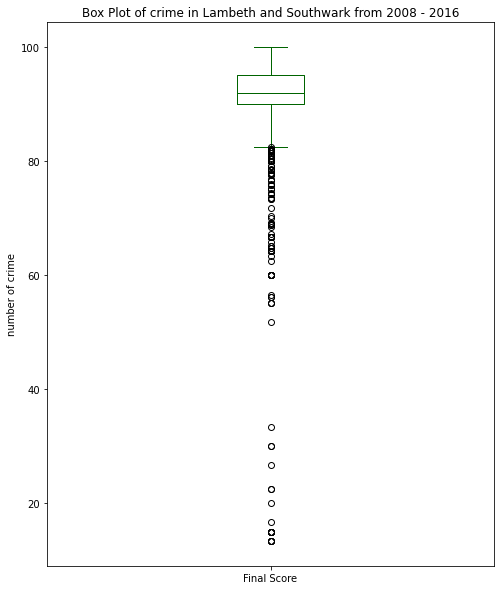

In [104]:
# Write your function below
Final_Score
# Graded-Funtion Begin (~1 Lines)
Final_Score.plot(kind='box',figsize=(8,10),color='darkgreen')
# Graded-Funtion End

plt.title('Box Plot of crime in Lambeth and Southwark from 2008 - 2016')
plt.ylabel('number of crime')

plt.show()

## Z-Score

akan digunakan saat Probability Distribution, Intervals dan Hypotesis Testing
nilai z tabel diperoleh dengan membaca tabel distribus normal

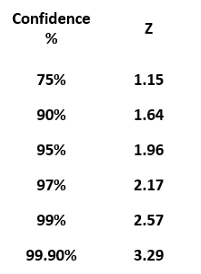

## Probability Distribution

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
from scipy.stats import norm

In [106]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [107]:
Kecepatan_pelayanan=data_feed_elearn['Kecepatan pelayanan']
Kemudahan_fungsi_fungsi_untuk_digunakan=data_feed_elearn['Kemudahan fungsi fungsi untuk digunakan']
Kemudahan_nama_situs_untuk_diingate=data_feed_elearn['Kemudahan nama situs untuk diingat']
Kemudahan_situs_untuk_dipahami=data_feed_elearn['Kemudahan situs untuk dipahami']
Kemudahan_untuk_dihubungi=data_feed_elearn['Kemudahan untuk dihubungi']
Kemudahan_untuk_dipahami=data_feed_elearn['Kemudahan untuk dipahami']
Kenyamanan_dalam_mempelajari_materi=data_feed_elearn['Kenyamanan dalam mempelajari materi']
Keramahan_petugas=data_feed_elearn['Keramahan petugas']
Manfaat_terhadap_tugas=data_feed_elearn['Manfaat terhadap tugas']
Pengetahuan_terhadap_situs=data_feed_elearn['Pengetahuan terhadap situs']
Sistematika_Penulisan=data_feed_elearn['Sistematika Penulisan']
Tampilan_situs=data_feed_elearn['Tampilan situs']
Final_Score=data_feed_elearn['Final Score']

In [108]:
Final_Score

0        89.17
1       100.00
2        91.20
3        88.62
4        90.00
         ...  
2565     91.68
2566     96.30
2567     90.85
2568     91.74
2569     91.02
Name: Final Score, Length: 2570, dtype: float64

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Normal Distribution of Final Score Feedback E-learning')]

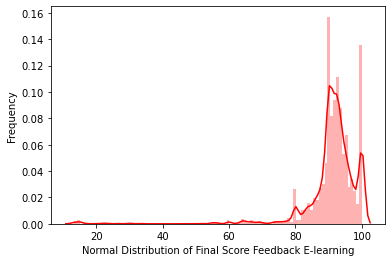

In [109]:
ax = sns.distplot(Final_Score,
                 bins=100,
                 kde=True,
                 color='red',
                 hist_kws={'linewidth':15,'alpha':0.3})
ax.set(xlabel='Normal Distribution of Final Score Feedback E-learning',ylabel='Frequency')

In [110]:
cek_mean_Final_Score=statistics.mean(Final_Score)
cek_median_Final_Score=statistics.median(Final_Score)
cek__modus_Final_Score=statistics.mode(Final_Score)
print(cek_mean_Final_Score)
print(cek_median_Final_Score)
print(cek__modus_Final_Score)

91.08625680933852
91.99
100.0


Insight Probability distribution data Nilai Final Score:
1. data Final Score memusat diantara range 80 sampai dengan 100.
2. nilai mean = 91.08625680933852
3. Nilai median = 91.99
4. Nilai modus = 100.0

## Confidence Inetervals

In [111]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [112]:
Final_Score=data_feed_elearn['Final Score']

In [113]:
Final_Score

0        89.17
1       100.00
2        91.20
3        88.62
4        90.00
         ...  
2565     91.68
2566     96.30
2567     90.85
2568     91.74
2569     91.02
Name: Final Score, Length: 2570, dtype: float64

Kita akan menghitung interval dari Final Score
sehingga kita perlu dekripsikan nilai setiap parameter

1. confidence interval yang digunakan adalah 95%, sehingga nilai dari z-score adala 1.96

In [114]:
z_score=1.96

2. Menghitung nilai rata-rata dari Final Score

In [115]:
mean_Final_Score_CI=statistics.mean(Final_Score)
mean_Final_Score_CI

91.08625680933852

3. menetukan jumlah sampel

In [116]:
Final_Score.shape

(2570,)

In [117]:
n=2570

4. menentukan standar deviasi Final Score

In [118]:
stdev_Final_Score_CI=statistics.stdev(Final_Score)
stdev_Final_Score_CI

8.908971138902489

5. menentukan se

In [119]:
se = stdev_Final_Score_CI/np.sqrt(n)
se

0.17573610250945318

Rekapitulasi parameter

In [120]:
print(mean_Final_Score_CI)
print(z_score)
print(se)

91.08625680933852
1.96
0.17573610250945318


6. menghitung batas atas dan batas bawah

In [121]:
Final_Score_lcb=mean_Final_Score_CI - z_score*se
Final_Score_ucb=mean_Final_Score_CI + z_score*se
print(Final_Score_lcb,Final_Score_ucb)

90.74181404842 91.43069957025705


Convidence interval dari Nilai Final Score dengan keyakinan 95% adalah nilai Final Score diantara 90.74 sampai dengan 91.43

## Hypotesis Testing

In [122]:
data_feed_elearn.head()

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00


In [123]:
Final_Score=data_feed_elearn['Final Score']
Kemudahan_situs_untuk_dipahami=data_feed_elearn['Kemudahan situs untuk dipahami']
Kecepatan_pelayanan=data_feed_elearn['Kecepatan pelayanan']

In [124]:
print(Final_Score)
print(Kemudahan_situs_untuk_dipahami)
print(Kecepatan_pelayanan)

0        89.17
1       100.00
2        91.20
3        88.62
4        90.00
         ...  
2565     91.68
2566     96.30
2567     90.85
2568     91.74
2569     91.02
Name: Final Score, Length: 2570, dtype: float64
0       100.00
1       100.00
2        91.25
3        88.11
4        90.00
         ...  
2565     92.23
2566     96.67
2567     91.54
2568     92.61
2569     90.82
Name: Kemudahan situs untuk dipahami, Length: 2570, dtype: float64
0       100.00
1       100.00
2        91.25
3        88.11
4        90.00
         ...  
2565     91.32
2566     94.80
2567     90.59
2568     91.36
2569     90.90
Name: Kecepatan pelayanan, Length: 2570, dtype: float64


In [125]:
import statsmodels.api as sm

-- Pada case ini, kita akan menguji 3 rata-rata kelompok data yaitu Final Score (kode=1),Kemudahan situs untuk dipahami (kode=2) dan Kecepatan pelayanan (kode=3)
kita akan mencari jumlah sampel, mu dan sd utuk setiap kelompok data.

case 1 adalah menguji apakah rata-rata nilai final score sama dengan rata-rata nilai Kemudahan situs untuk dipahami

case 2 adalah menguji apakah rata-rata nilai final score sama dengan rata-rata nilai Kecepatan pelayanan

In [126]:
## Final Score
n1=len(Final_Score)
mu1 = Final_Score.mean()
sd1 = Final_Score.std()
(n1,mu1,sd1)

(2570, 91.08625680933854, 8.90897113890248)

In [127]:
## Kemudahan situs untuk dipahami
n2=len(Kemudahan_situs_untuk_dipahami)
mu2 = Kemudahan_situs_untuk_dipahami.mean()
sd2 = Kemudahan_situs_untuk_dipahami.std()
(n2,mu2,sd2)

(2570, 89.1697976653698, 17.598739277880323)

In [128]:
## Kecepatan Pelayanan
n3=len(Kecepatan_pelayanan)
mu3 = Kecepatan_pelayanan.mean()
sd3 = Kecepatan_pelayanan.std()
(n3,mu3,sd3)

(2570, 90.75810116731527, 11.371855825578677)

nilai_alpha = 0.05 (5%)

panduan menjawab hipotesis
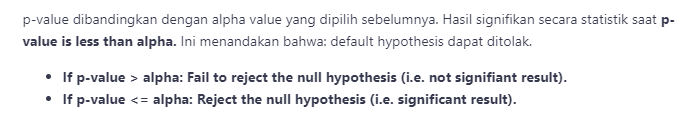

case 1

H0 : mu1 = mu2 (rata-rata nilai Final Score sama dengan rata-rata nilai Kemudahan situs untuk dipahami)

H1 : mu1 ~= mu2 (rata-rata nilai Final Score tidak sama dengan rata-rata nilai Kemudahan situs untuk dipahami)

In [129]:
sm.stats.ztest(Final_Score.dropna(),Kemudahan_situs_untuk_dipahami.dropna(),alternative='two-sided')

(4.925424480160536, 8.417741725361513e-07)

insight case 1
1. Nilai p-value (8.417741725361513e-07) < Nilai alpha (0.05)
2. Tolak H0
3. Sehingga dapat ditarik kesimpulan bahwa rata-rata nilai Final Score tidak sama dengan rata-rata nilai Kemudahan situs untuk dipahami

case 2

H0 : mu1 = mu3 (rata-rata nilai Final Score sama dengan rata-rata nilai Kecepatan Pelayanan)

H1 : mu1 ~= mu3 (rata-rata nilai Final Score tidak sama dengan rata-rata nilai Kecepatan Pelayanan)

In [130]:
sm.stats.ztest(Final_Score.dropna(),Kecepatan_pelayanan.dropna(),alternative='two-sided')

(1.1515871011623902, 0.24949078434311334)

insight case 2
1. Nilai p-value (0.24949078434311334) > Nilai alpha (0.05)
2. Tidak Tolak H0
3. Sehingga dapat ditarik kesimpulan bahwa rata-rata nilai Final Score sama dengan rata-rata nilai Kecepatan Pelayanan